In [ ]:
from grade_classif.data.read import get_files
from grade_classif.imports import *
from PIL import Image

In [ ]:
data = Path("/data/DeepLearning/SCHWOB_Robin/feature_vis_all/")

In [ ]:
slidetype = "base"
aug = 0

In [ ]:
files = get_files(data, extensions=[".csv"]).filter(lambda x: x.stem==f"{slidetype}_{aug}")

In [ ]:
dfs = []
for file in tqdm(files):
    slide_df = pd.read_csv(file, dtype=np.float32)
    slidename = file.parent.name
    feats = slide_df.filter(regex=r"feature_\d+").values
    """dist_bg = ((feats - bg[None]) ** 2).sum(1)
    mask = (dist_bg > 1e-2)
    slide_df = slide_df[mask]"""
    n = len(slide_df)
    slide_df.insert(0, "slidename", slidename)
    slide_df.insert(3, "pacs", slidename.split("_")[1])
    dfs.append(slide_df)
df = pd.concat(dfs, ignore_index=True, copy=False)

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
cohorts = df["pacs"].unique()
cohorts.sort()

In [ ]:
centroids = []
distances = {}
for k, pacs in enumerate(cohorts):
    sub_df = df.loc[df["pacs"] == pacs]
    feats = sub_df.filter(regex=r"feature_\d+").values
    centroid = feats.mean(0)
    centroids.append(centroid)
    #distances[pacs] = np.sqrt(((feats - centroid[None]) ** 2).sum(1))
centroids = np.stack(centroids)

In [ ]:
center = centroids[0]

In [ ]:
np.save(data/f"centroids_{slidetype}_{aug}.npy", centroids)

In [ ]:
centroid_distances = np.sqrt(((centroids[None] - centroids[:, None]) ** 2).sum(-1))

In [ ]:
#max_dist = max([distances[pacs].max() for pacs in distances])

In [ ]:
norm1 = np.linalg.norm(centroids[1]-center)
u1 = (centroids[1]-center) / norm1

In [ ]:
scal = np.dot(centroids[2]-center, centroids[1]-center)
l2 = norm1**2/np.linalg.norm(norm1**2*(centroids[2]-center)-scal*(centroids[1]-center))
l1 = -l2 * scal / norm1**2
u2 = l1 * (centroids[1]-center) + l2 * (centroids[2] - center)

In [ ]:
pacs_centers = []
for centroid in centroids:
    x = np.dot(centroid-center, u1)
    y = np.dot(centroid-center, u2)
    pacs_centers.append(np.array([x, y]))
pacs_centers = np.stack(pacs_centers)

In [ ]:
centroid_distances

array([[0.       , 3.695562 , 4.1840987, 2.2030938],
       [3.695562 , 0.       , 2.7950697, 3.7854257],
       [4.1840987, 2.7950697, 0.       , 3.8744133],
       [2.2030938, 3.7854257, 3.8744133, 0.       ]], dtype=float32)

In [ ]:
for pacs_center in pacs_centers[:-1]:
    print(((pacs_centers[-1]-pacs_center)**2).sum()**0.5)

0.8907155442641395
3.204559005177401
3.309203757087256


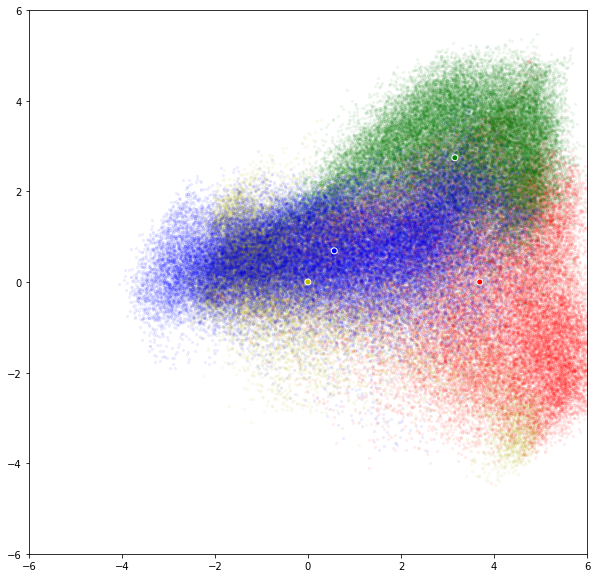

In [ ]:
plt.figure(figsize=(10, 10))
plt.axis([-6, 6, -6, 6])
for pacs, color in zip(cohorts, "yrgb"):
    sub_df = df.loc[df["pacs"] == pacs]
    feats = sub_df.filter(regex=r"feature_\d+").values
    vecs = feats-center
    x = np.dot(vecs, u1)
    y = np.dot(vecs, u2)
    plt.scatter(x, y, c=color, alpha=0.05, s=5)
plt.scatter(pacs_centers[:, 0], pacs_centers[:, 1], c=["y", "r", "g", "b"], edgecolor="white")

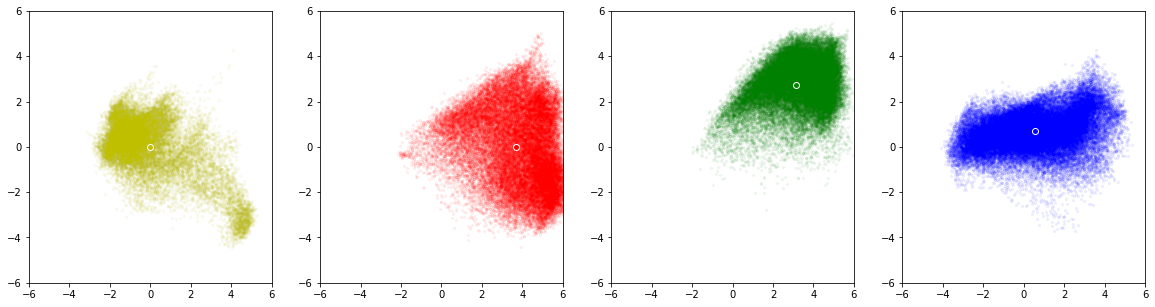

In [ ]:
fig, axs = plt.subplots(1, len(cohorts), figsize=(5*len(cohorts), 5))
for pacs_center, ax, pacs, color in zip(pacs_centers, axs, cohorts, "yrgb"):
    ax.axis([-6, 6, -6, 6])
    sub_df = df.loc[df["pacs"] == pacs]
    feats = sub_df.filter(regex=r"feature_\d+").values
    vecs = feats-center
    x = np.dot(vecs, u1)
    y = np.dot(vecs, u2)
    ax.scatter(x, y, c=color, alpha=0.05, s=5)
    ax.scatter([pacs_center[0]], [pacs_center[1]], c=color, edgecolor="white")

In [ ]:
slidetype = "normalized_first"
aug = 1

In [ ]:
files = get_files(data, extensions=[".csv"]).filter(lambda x: x.stem==f"{slidetype}_{aug}")

In [ ]:
dfs = []
for file in tqdm(files):
    slide_df = pd.read_csv(file, dtype=np.float32)
    slidename = file.parent.name
    feats = slide_df.filter(regex=r"feature_\d+").values
    """dist_bg = ((feats - bg[None]) ** 2).sum(1)
    mask = (dist_bg > 1e-2)
    slide_df = slide_df[mask]"""
    n = len(slide_df)
    slide_df.insert(0, "slidename", slidename)
    slide_df.insert(3, "pacs", slidename.split("_")[1])
    dfs.append(slide_df)
df = pd.concat(dfs, ignore_index=True, copy=False)

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
centroids = []
distances = {}
for k, pacs in enumerate(cohorts):
    sub_df = df.loc[df["pacs"] == pacs]
    feats = sub_df.filter(regex=r"feature_\d+").values
    centroid = feats.mean(0)
    centroids.append(centroid)
    #distances[pacs] = np.sqrt(((feats - centroid[None]) ** 2).sum(1))
centroids = np.stack(centroids)

In [ ]:
np.save(data/f"centroids_{slidetype}_{aug}.npy", centroids)

In [ ]:
centroid_distances = np.sqrt(((centroids[None] - centroids[:, None]) ** 2).sum(-1))

In [ ]:
#max_dist = max([distances[pacs].max() for pacs in distances])

In [ ]:
pacs_centers_new = []
for centroid in centroids:
    x = np.dot(centroid-center, u1)
    y = np.dot(centroid-center, u2)
    pacs_centers_new.append(np.array([x, y]))
pacs_centers_new = np.stack(pacs_centers_new)

In [ ]:
centroid_distances

array([[0.       , 2.8259633, 2.9341078, 1.9364709],
       [2.8259633, 0.       , 1.9436892, 1.9564484],
       [2.9341078, 1.9436892, 0.       , 2.5709782],
       [1.9364709, 1.9564484, 2.5709782, 0.       ]], dtype=float32)

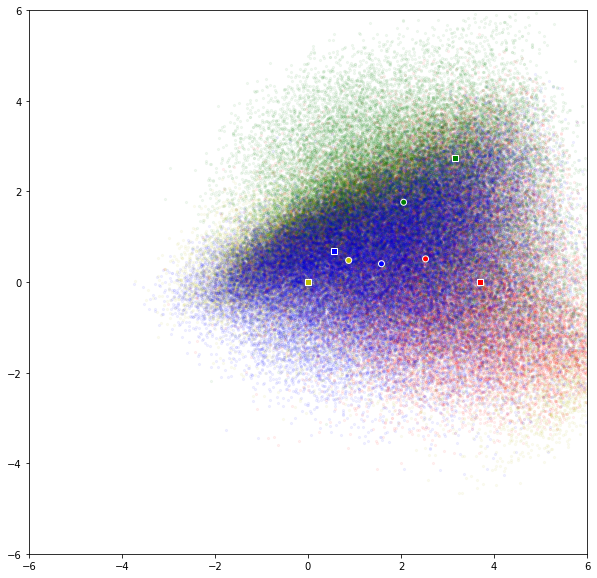

In [ ]:
plt.figure(figsize=(10, 10))
plt.axis([-6, 6, -6, 6])
for pacs, color in zip(cohorts, "yrgb"):
    sub_df = df.loc[df["pacs"] == pacs]
    feats = sub_df.filter(regex=r"feature_\d+").values
    vecs = feats-center
    x = np.dot(vecs, u1)
    y = np.dot(vecs, u2)
    plt.scatter(x, y, c=color, alpha=0.05, s=5)
plt.scatter(pacs_centers[:, 0], pacs_centers[:, 1], marker="s", c=["y", "r", "g", "b"], edgecolor="white")
plt.scatter(pacs_centers_new[:, 0], pacs_centers_new[:, 1], c=["y", "r", "g", "b"], edgecolor="white")

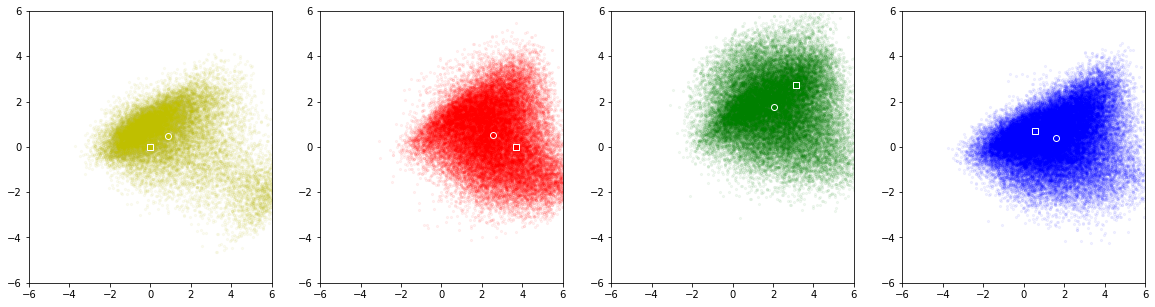

In [ ]:
fig, axs = plt.subplots(1, len(cohorts), figsize=(5*len(cohorts), 5))
for pacs_center, pacs_center_new, ax, pacs, color in zip(pacs_centers, pacs_centers_new, axs, cohorts, "yrgb"):
    ax.axis([-6, 6, -6, 6])
    sub_df = df.loc[df["pacs"] == pacs]
    feats = sub_df.filter(regex=r"feature_\d+").values
    vecs = feats-center
    x = np.dot(vecs, u1)
    y = np.dot(vecs, u2)
    ax.scatter(x, y, c=color, alpha=0.05, s=5)
    ax.scatter([pacs_center[0]], [pacs_center[1]], marker="s", c=color, edgecolor="white")
    ax.scatter([pacs_center_new[0]], [pacs_center_new[1]], c=color, edgecolor="white")